## Classification 

In [23]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pylab as plt
%matplotlib inline


### Importing dateset

In [24]:
train_set = pd.read_csv('D-train.csv')
test_set = pd.read_csv('D-test.csv')


In [25]:
train_set

,x1,x2,x3,x4,x5,y
0,3.29,13.54,9.40,12.62,1.95,B
1,-10.87,24.20,24.09,23.96,0.11,B
2,-20.62,32.28,32.31,33.47,-1.30,B
3,3.01,0.44,19.68,-8.05,2.38,A
4,7.53,2.31,4.71,-0.88,2.25,B
...,...,...,...,...,...,...
185,-5.74,-11.02,-11.08,-8.11,-2.61,A
186,3.59,8.10,2.17,8.51,1.26,B
187,-5.97,-16.04,13.05,-24.04,-0.77,A
188,-41.36,-22.59,-18.71,-10.61,-12.06,C


In [26]:
train_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 190 entries, 0 to 189
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x1      190 non-null    float64
 1   x2      190 non-null    float64
 2   x3      190 non-null    float64
 3   x4      190 non-null    float64
 4   x5      190 non-null    float64
 5   y       190 non-null    object 
dtypes: float64(5), object(1)
memory usage: 9.0+ KB


In [27]:
test_set

,x1,x2,x3,x4,x5,y
0,13.87,-1.59,-9.22,-1.92,2.49,D_01
1,39.41,-10.24,3.14,-24.40,9.37,D_02
2,-0.98,-6.98,-12.01,-3.83,-1.44,D_03
3,-4.39,-22.38,4.94,-29.28,-1.25,D_04
4,-8.66,-5.71,14.59,-10.83,-1.00,D_05
5,2.20,9.24,-5.77,13.47,0.30,D_06
6,-8.28,-5.53,20.95,-13.24,-0.36,D_07
7,-15.23,25.83,20.04,28.76,-1.23,D_08
8,-23.17,-18.72,-6.80,-15.12,-6.61,D_09
9,13.27,16.44,6.65,14.83,4.18,D_10


In [28]:
test_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x1      10 non-null     float64
 1   x2      10 non-null     float64
 2   x3      10 non-null     float64
 3   x4      10 non-null     float64
 4   x5      10 non-null     float64
 5   y       10 non-null     object 
dtypes: float64(5), object(1)
memory usage: 608.0+ bytes


### Data Exploration

<AxesSubplot:xlabel='y', ylabel='count'>

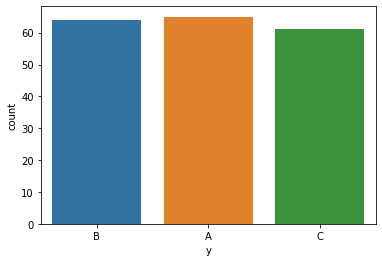

In [29]:
sns.countplot(x="y" , data=train_set)

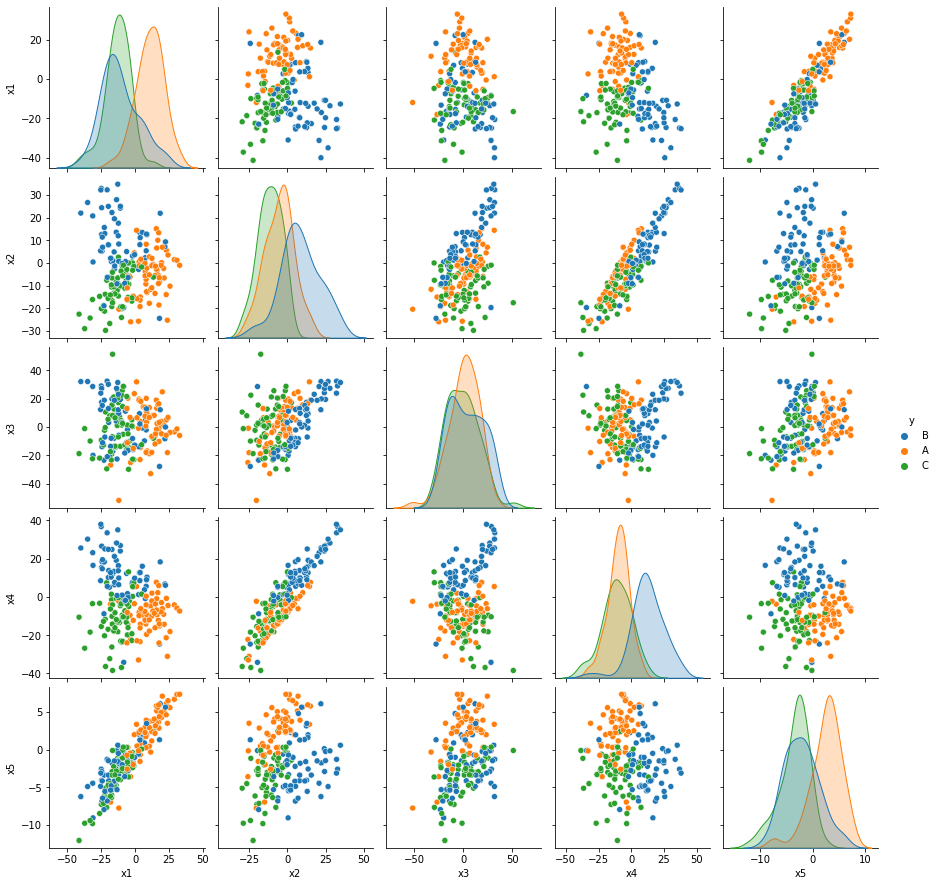

In [30]:
sns.pairplot(train_set, hue="y")

### To do **`Decision Tree`**

In [31]:
X_train = train_set.iloc[:, :-1]
y_train = train_set.iloc[:, -1]
X_test = test_set.iloc[:, :-1]
y_test = train_set.loc[[83,167,157,29,96,16,184,30,14,45], ["y"]]

# from sklearn.model_selection import train_test_split
# X = train_set.iloc[:, :-1]
# y = train_set.iloc[:, -1]
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

### Perform Feature Scaling

In [32]:

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

In [33]:
y_test

,y
83,B
167,B
157,A
29,B
96,B
16,A
184,B
30,B
14,C
45,A


In [34]:
X_test

array([[ 0.77361268,  0.02609038, -1.12568739,  0.12807459,  0.51197071],
       [ 2.28578687, -0.57733682, -0.04469165, -1.15954476,  2.23439538],
       [-0.1056272 , -0.34991801, -1.36969856,  0.01867277, -0.47191432],
       [-0.30752673, -1.4242277 ,  0.11273491, -1.43906356, -0.42434736],
       [-0.5603452 , -0.26132234,  0.95671621, -0.38227632, -0.36175925],
       [ 0.08265447,  0.78159518, -0.82395314,  1.00958981, -0.0363011 ],
       [-0.53784614, -0.24876548,  1.51295674, -0.52031736, -0.2015337 ],
       [-0.94934225,  1.9389197 ,  1.43336886,  1.88537717, -0.41934031],
       [-1.41945435, -1.16890475, -0.91403612, -0.62800083, -1.76623635],
       [ 0.73808784,  1.28386984,  0.26229015,  1.08748849,  0.9350663 ]])

In [35]:
y_train

0      B
1      B
2      B
3      A
4      B
      ..
185    A
186    B
187    A
188    C
189    C
Name: y, Length: 190, dtype: object

In [36]:
from sklearn.neural_network import MLPClassifier

In [37]:
clf = MLPClassifier(hidden_layer_sizes=(100,100) ,activation="tanh")

In [38]:
clf.fit(X_train, y_train)

c:\Users\LENOVO LEGION\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier(activation='tanh', hidden_layer_sizes=(100, 100))

### To predict from test set

In [39]:
y_pred = clf.predict(X_test)


In [40]:
y_pred

array(['A', 'A', 'C', 'C', 'C', 'B', 'C', 'B', 'C', 'B'], dtype='<U1')

In [41]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import f1_score

cm_labls = train_set["y"].unique()
print(cm_labls)
confusion_matrix(y_test, y_pred, labels=cm_labls)

['B' 'A' 'C']


array([[1, 2, 3],
       [2, 0, 1],
       [0, 0, 1]], dtype=int64)

In [42]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           A       0.00      0.00      0.00         3
           B       0.33      0.17      0.22         6
           C       0.20      1.00      0.33         1

    accuracy                           0.20        10
   macro avg       0.18      0.39      0.19        10
weighted avg       0.22      0.20      0.17        10



In [43]:
f1 = f1_score(y_test, y_pred, average="weighted")
print("F1 =",f1)

F1 = 0.16666666666666666


In [44]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.2